In [15]:
import pandas as pd
import numpy as np
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv (url)
#view first six rows of dataset
data[0:6]


,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572


In [5]:
len(data. index )
#find total observations in dataset

10000

In [6]:
#Затем мы разделим набор данных на обучающий набор для обучения модели и тестовый набор для проверки модели.
#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0) 

In [17]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [13]:
data.dtypes.value_counts()

int64      2
float64    2
dtype: int64

In [ ]:
sns.pairplot(data, hue="student")

In [18]:
#подогнать модель логистической регрессии к набору данных
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression. fit (X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression. predict (X_test)

In [19]:
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

array([[2870,   17],
       [  93,   20]], dtype=int64)

In [21]:
print(" Accuracy:",metrics. accuracy_score (y_test, y_pred))
#Это говорит нам о том, что модель сделала правильный прогноз относительно того, будет ли человек не выполнять свои обязательства в 96,2% случаев.

 Accuracy: 0.9633333333333334


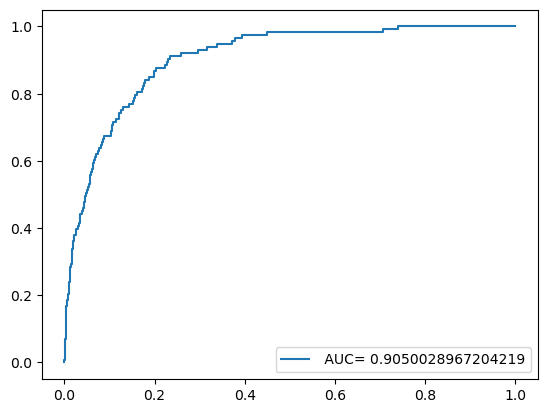

In [24]:
#define metrics
y_pred_proba = log_regression. predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()